In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [20]:
start=pd.read_csv("50_Startups.csv")

In [21]:
start

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [24]:
start.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [25]:
start1=start.rename({'R&D Spend':'Reserch','Administration':'Admin','Marketing Spend':'MS'},axis=1)

In [26]:
start1

,Reserch,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [27]:
start1[start1.duplicated()]

,Reserch,Admin,MS,State,Profit


In [28]:
start1.describe()

,Reserch,Admin,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [29]:
start.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [30]:
sns.set_style(style='darkgrid')

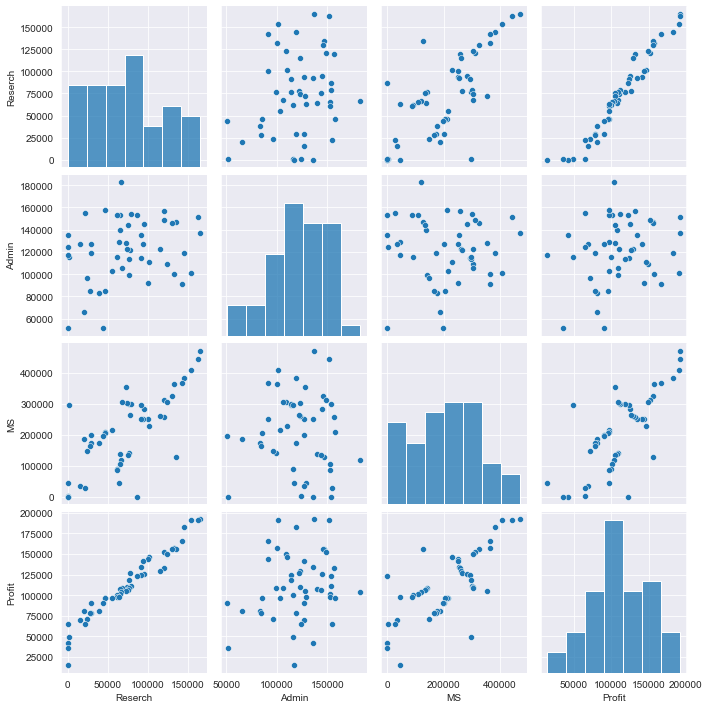

In [31]:
sns.pairplot(start1)

In [32]:
model=smf.ols("Profit~Reserch+Admin+MS",data=start1).fit()

In [33]:
model

In [34]:
model.params

Intercept    50122.192990
Reserch          0.805715
Admin           -0.026816
MS               0.027228
dtype: float64

In [35]:
model.tvalues , model.pvalues

(Intercept     7.626218
 Reserch      17.846374
 Admin        -0.525507
 MS            1.655077
 dtype: float64,
 Intercept    1.057379e-09
 Reserch      2.634968e-22
 Admin        6.017551e-01
 MS           1.047168e-01
 dtype: float64)

model.rsquared , model.rsquared_adj

In [40]:
SLR=smf.ols("Profit~Admin",data=start1).fit()

In [41]:
SLR.tvalues,SLR.pvalues

(Intercept    3.040044
 Admin        1.419493
 dtype: float64,
 Intercept    0.003824
 Admin        0.162217
 dtype: float64)

In [42]:
SLR_1=smf.ols("Profit~MS",data=start1).fit()

In [43]:
SLR_1.tvalues,SLR_1.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [45]:
MLR=smf.ols("Profit~Admin+MS",data=start1).fit()

In [46]:
MLR.pvalues,MLR.tvalues

(Intercept    2.589341e-01
 Admin        1.729198e-02
 MS           9.727245e-11
 dtype: float64,
 Intercept    1.142741
 Admin        2.467779
 MS           8.281039
 dtype: float64)

In [49]:
#Model Validation
#1.Collinearity Check
rsq_r=smf.ols("Reserch~Admin+MS",data=start1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Admin~Reserch+MS",data=start1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MS~Reserch+Admin",data=start1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['Rererch','Admin','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Rererch,2.468903
1,Admin,1.175091
2,MS,2.326773


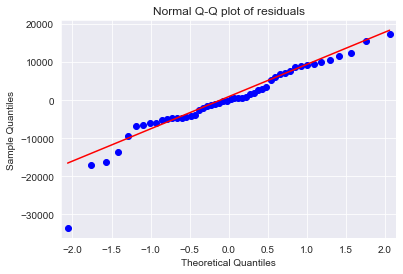

In [50]:
#2) Residual Analysis
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [51]:
list(np.where(model.resid>5)) 

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [52]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

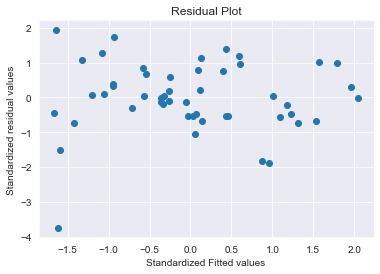

In [53]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

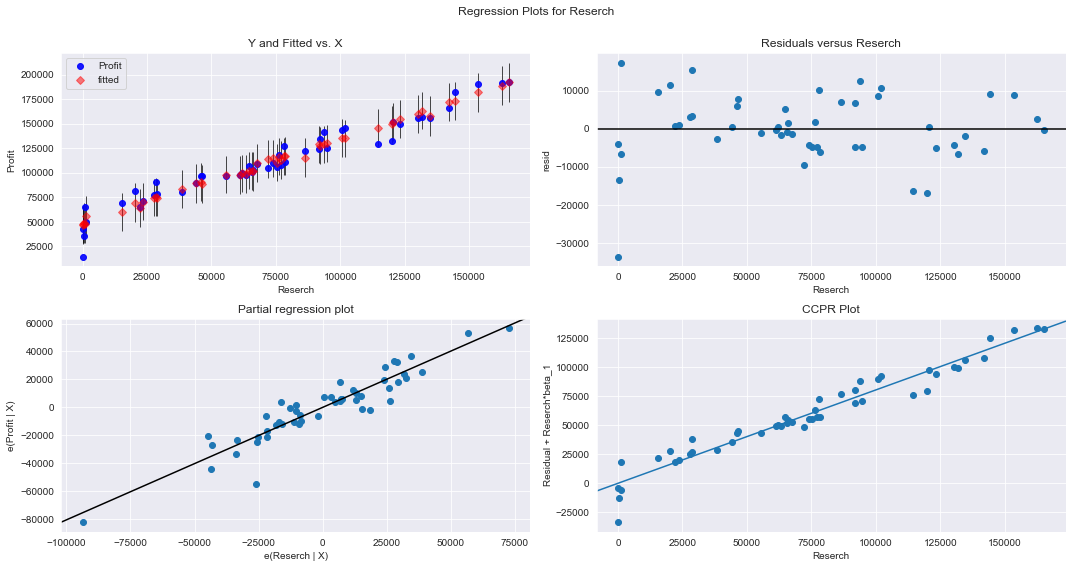

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Reserch", fig=fig)
plt.show()

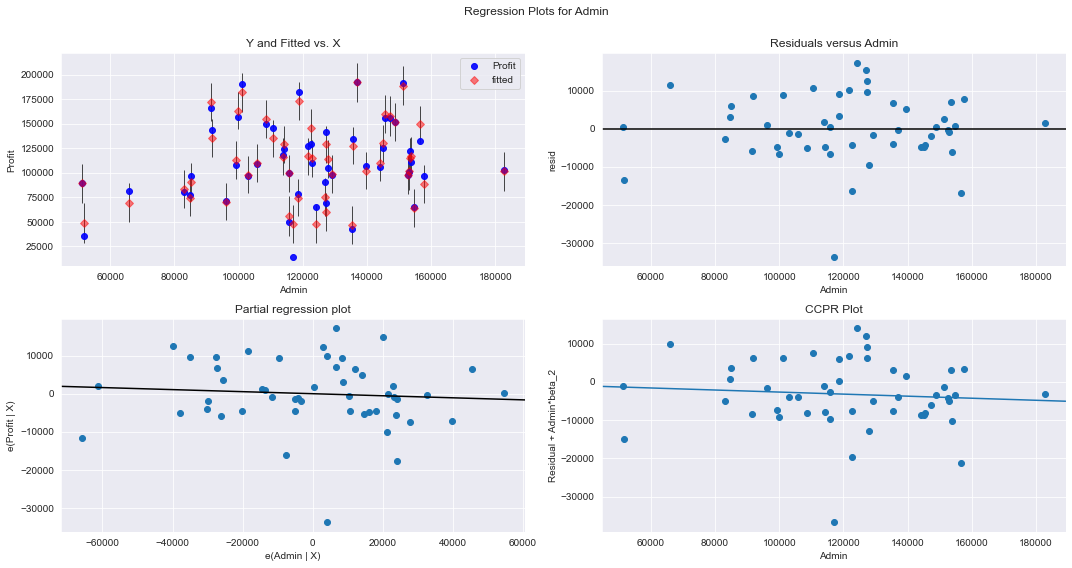

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

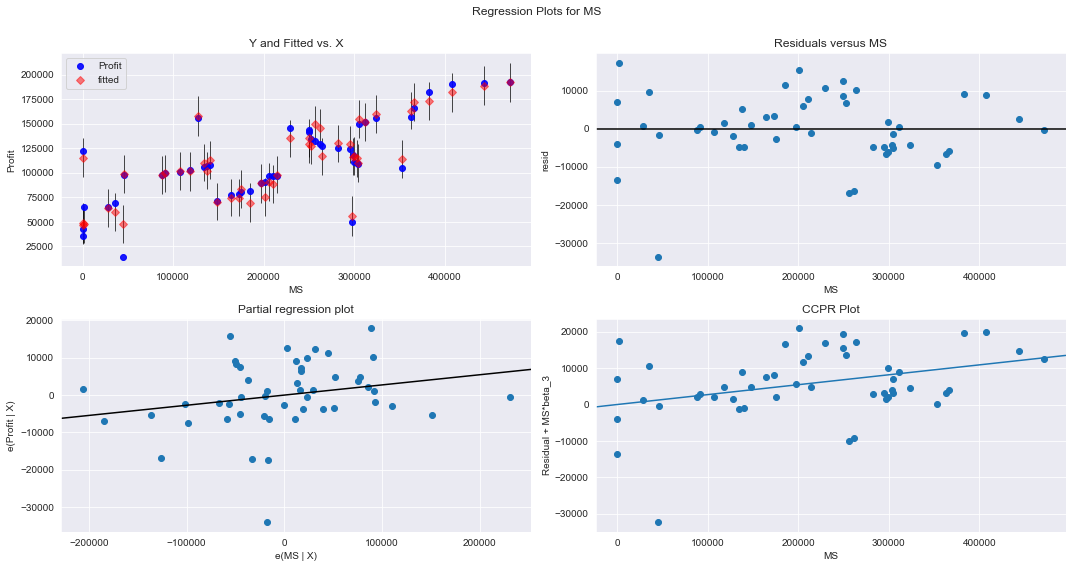

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

In [59]:
#Model Deletion Diagnostics
#Detecting Influencers/Outliers
#Cook’s Distance¶
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

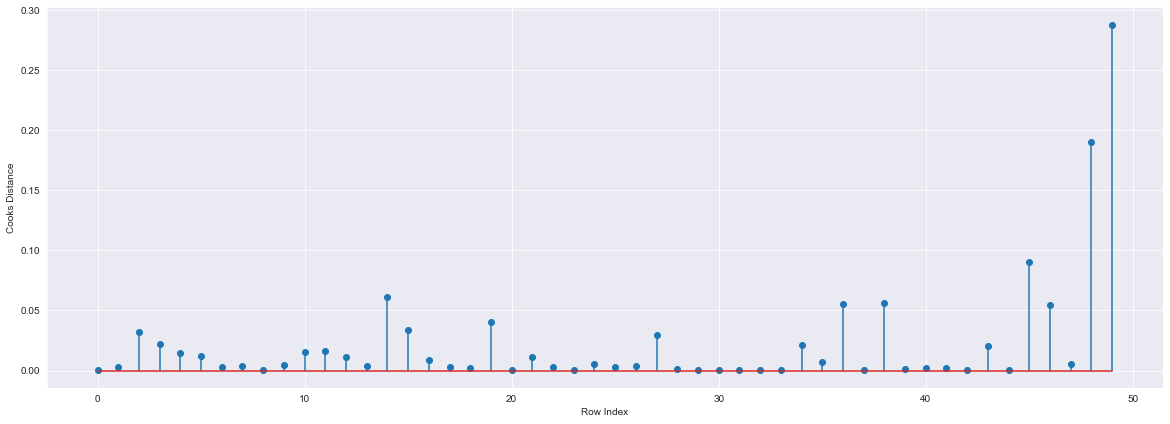

In [61]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(start1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

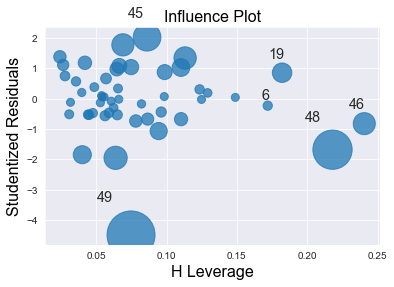

In [63]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [65]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=start1.shape[1]
n=start1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [66]:
start1[start1.index.isin([49])]

,Reserch,Admin,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [67]:
Start2=start1.drop(start1.index[[49]],axis=0).reset_index(drop=True)
Start2

,Reserch,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [68]:
model2=smf.ols("Profit~Reserch+Admin+MS",data=Start2).fit()

In [70]:
model2.params

Intercept    52382.439251
Reserch          0.783002
Admin           -0.022201
MS               0.025234
dtype: float64

In [71]:
model2.tvalues,model2.pvalues

(Intercept     9.450782
 Reserch      20.469501
 Admin        -0.517889
 MS            1.825383
 dtype: float64,
 Intercept    2.960000e-12
 Reserch      1.971077e-24
 Admin        6.070728e-01
 MS           7.458443e-02
 dtype: float64)

In [72]:
model2.rsquared,model2.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

In [74]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance
c

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

In [75]:
np.argmax(c) , np.max(c)

(48, 0.39274420556321554)

In [78]:
Start2

,Reserch,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [79]:
new_data=pd.DataFrame({'Reserch':70000,"Admin":90000,"MS":140000},index=[0])
new_data

,Reserch,Admin,MS
0,70000,90000,140000


In [80]:
model2.predict(new_data)

0    108727.154753
dtype: float64

In [81]:
Predict=model2.predict(Start2)

In [82]:
Predict

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [85]:
S1={'Prep_Models':['Model','Model2'],'Rsquared':[model.rsquared,model2.rsquared]}
table=pd.DataFrame(S1)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Model2,0.961316
